In [30]:
%pylab inline
import numpy as np
import scipy.stats
import pylab as pl

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [85]:
# Test for means 1-100
means = range(1,101)

# Define a function to run KL Divergence test
def kl(dist, m, s):
    num_bins=20
    hist, bin_edges = np.histogram(dist, bins=num_bins)
    bin_centers = bin_edges[:-1] + (bin_edges[1] - bin_edges[0]) * .5
    norm = scipy.stats.norm.pdf(bin_centers, loc=m, scale=s)
    return scipy.stats.entropy(hist, norm)

# Define dict of tests to run
tests = {
    'KS Test': {
        'f': lambda dist, m, s: scipy.stats.kstest(dist, 'norm', args=(m,s))[0], 
        'results': [],
        'subplot': 131
    },
    'Anderson': {
        'f': lambda dist, m, s: scipy.stats.anderson(dist, 'norm')[0],
        'results': [],
        'subplot': 132
    },
    'KL Divergence': {
        'f': kl,
        'results': [],
        'subplot': 133
    }
}

# Generate samples of 5000 elements
size = 5000

# A function to plot the results
def plotResults(means, results):
    fig = pl.figure(figsize=(15, 5))
    for name, test in results.iteritems():
        fig.add_subplot(test['subplot'])
        pl.plot(means, test['results'], label=name)
        pl.legend()
        pl.xlabel('mean')
        pl.ylabel('score')

# Reset the results arrays for between problems
def resetResults(results):
    for name, test in results.iteritems():
        test['results'] = []

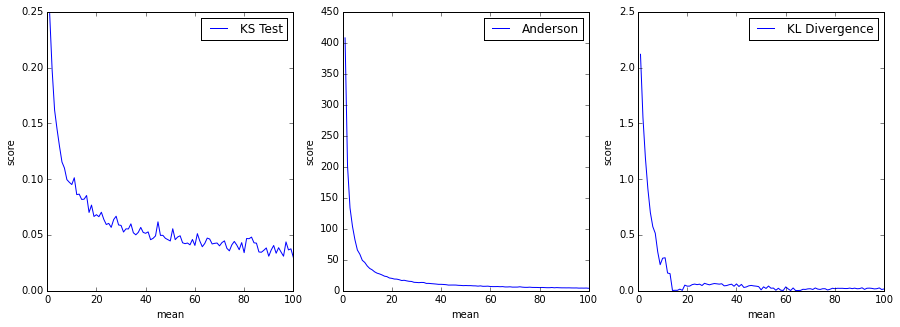

In [135]:
# Binomial
# Use p=.5
p = .5

resetResults(tests)

for i in means:
    # Get n and standard deviation based on mean/p
    n = i/p
    sd = (n * p * (1 - p))**.5
    
    # Generate Sample
    sample = np.random.binomial(n, p, size)
    
    # Do each of the tests on the sample
    for name,t in tests.iteritems():
        t['results'].append(t['f'](sample, i, sd))

# Plot all of the results
plotResults(means, tests)

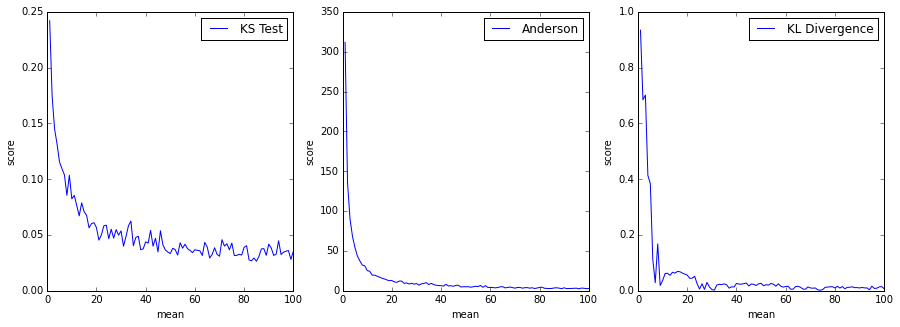

In [136]:
# Poisson
resetResults(tests)

for i in means:
    sample = np.random.poisson(i, size)
    for name,t in tests.iteritems():
        t['results'].append(t['f'](sample, i, i**.5))
        
plotResults(means, tests)